In [46]:
%matplotlib inline
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt


torch.manual_seed(39)    # reproducible

x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())    

In [47]:
## 搭建两层含有bias的全连接网络，隐藏层输出个数为20，激活函数都用sigmoid()

In [48]:

class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()

        # hidden layer
        self.fc1 = torch.nn.Linear(n_feature, n_hidden, bias=True)   
        # sigomid layer
        self.sigmoid1 = torch.nn.Sigmoid()
        # output layer
        self.fc2 = torch.nn.Linear(n_hidden, n_output, bias = True)  


 

    def forward(self, x):
        x = self.fc1(x)
        x = self.sigmoid1(x)
        x = self.fc2(x)
        # x = self.sigmoid2(x)

        return x

In [49]:
plt.ion()   # something about plotting

Net(
  (fc1): Linear(in_features=1, out_features=20, bias=True)
  (sigmoid1): Sigmoid()
  (fc2): Linear(in_features=20, out_features=1, bias=True)
)
<generator object Module.parameters at 0x7f92d18cf6d0>
x (100, 1)


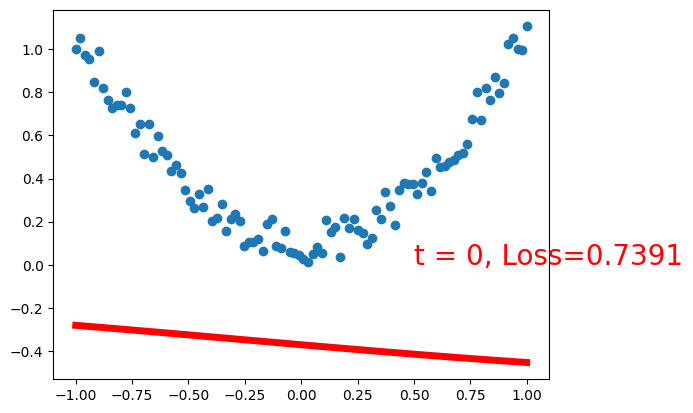

x (100, 1)


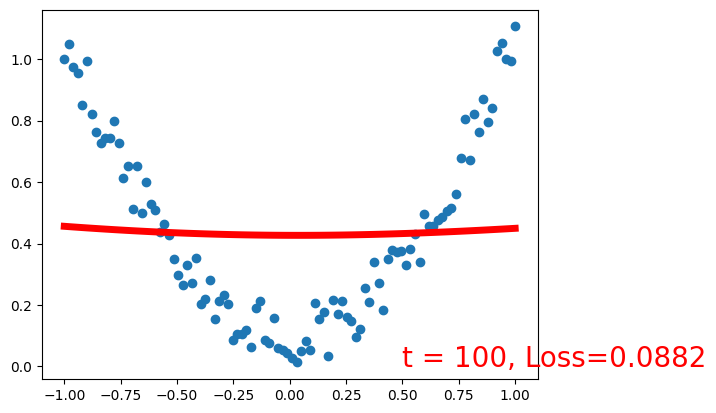

x (100, 1)


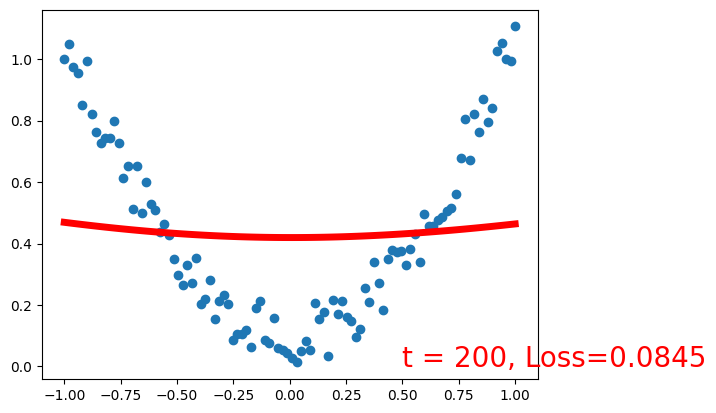

x (100, 1)


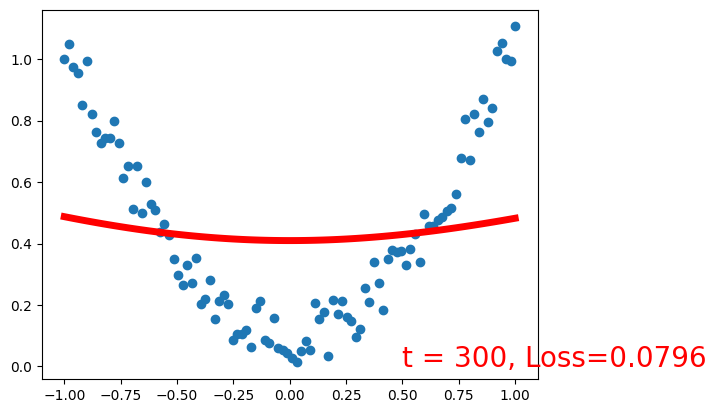

x (100, 1)


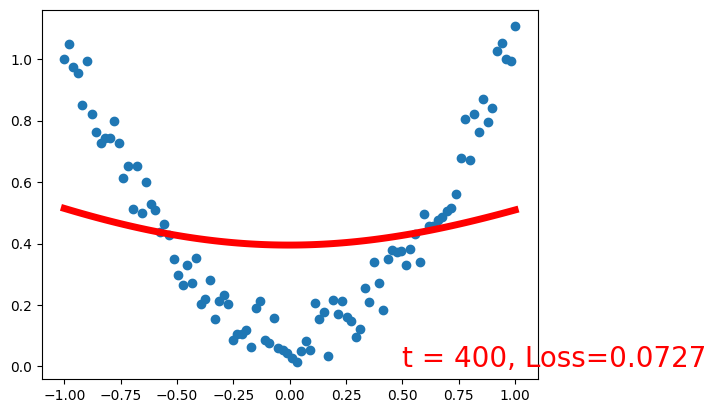

x (100, 1)


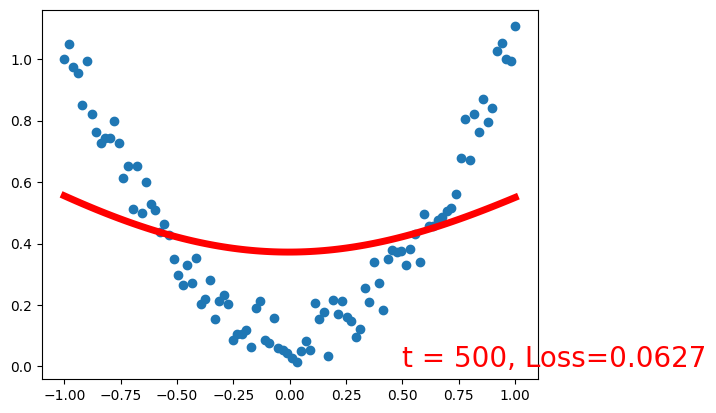

x (100, 1)


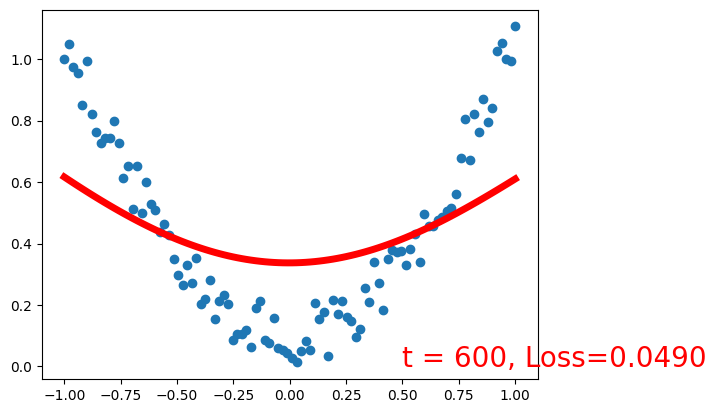

x (100, 1)


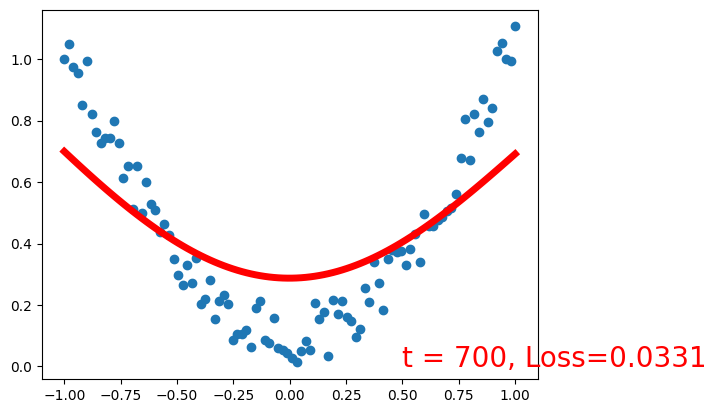

x (100, 1)


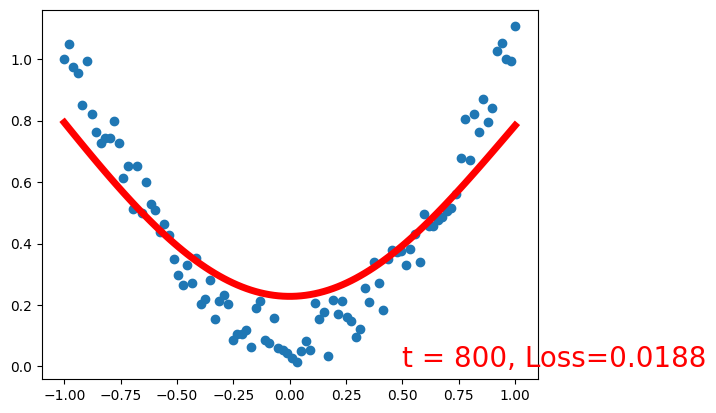

x (100, 1)


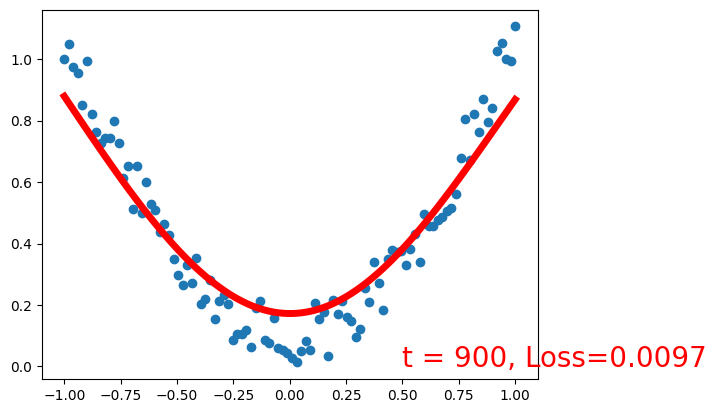

x (100, 1)


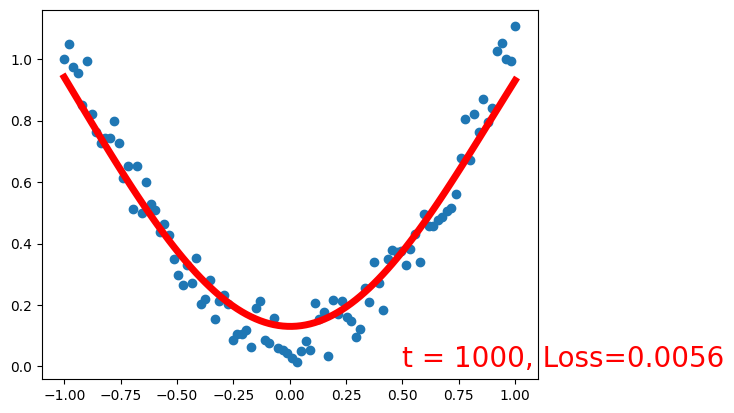

x (100, 1)


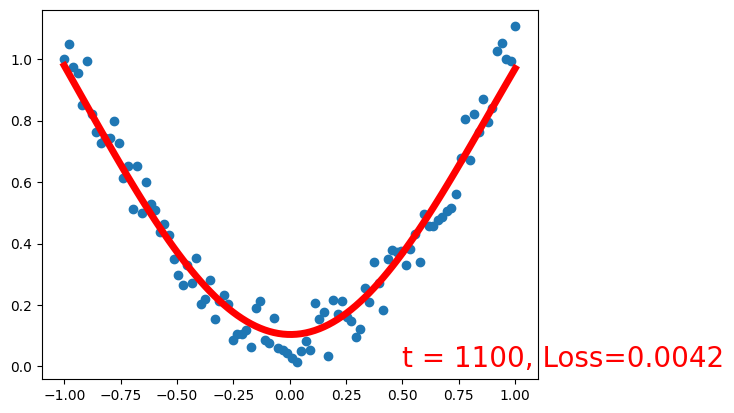

In [50]:
net = Net(n_feature=1, n_hidden=20, n_output=1)     # define the network
print(net)  # net architecture
print(net.parameters())
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

plt.ion()   # something about plotting

for t in range(1200):
    prediction = net(x)     # input x and predict based on x
    loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients

    if t % 100 == 0:
        print("x",x.numpy().shape)
        # plot and show learning process
        plt.cla()
        plt.scatter(x.numpy(), y.numpy())
        plt.plot(x.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 't = %d, Loss=%.4f' % (t, loss.data.numpy()), 
        fontdict={'size': 20, 'color':  'red'})
        # x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1) 
        # y = x.pow(2) + 0.2*torch.rand(x.size()) 
        # plt.scatter(x.numpy(), y.numpy())
        plt.pause(0.1)
        plt.show()

plt.ioff()
# plt.show()

In [51]:
w1 = torch.randn(1,10,requires_grad=True)
w2 = torch.randn(10,1,requires_grad=True)
b1 = torch.randn(1,10,requires_grad=True)
b2 = torch.randn(1,1,requires_grad=True)

x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size()) 

h = torch.mm(x, w1) + b1
h_sig = torch.sigmoid(h)
h = torch.mm(h_sig, w2) + b2
mse_loss = torch.mean((h - y)**2)

mse_loss.backward()

* 推导导数

    * 前向  
    $  h = xW_1 + b_1 $  
    $ h_{sig} = sig(h) = \frac{1}{1+e^{-h}}$  
    $ y_{pred} = h_{sig} \times W_2 + b_2$  
    $ loss = \frac {(y_{pred} - y_{label})^2} {n}  $

    * 反向
        1. 先对上述各式分别求导  
            $ \frac {\partial h}{\partial W_1} = x^T $  (1)  
            $\frac {\partial h}{\partial b_1} = 1 $   (2)  
            上述结果中的1是shape和b1一样的全1矩阵    
            $ \frac {\partial {h_{sig}}}{\partial h} = h \times (1 - h)$  (3)   
            $ \frac {\partial {y_{predict}}}{\partial h_{sig}} = W_2^T$  (4)  
            $ \frac {\partial {y_{predict}}}{\partial W_2}=  h_{sig}^T $  (5)  
            $ \frac {\partial {y_{predict}}}{\partial b_2} = 1$  (6)  
            上述结果的1是shape和b2一样的全1矩阵    
            $ \frac {\partial{loss}} {\partial {y_{predict}}} = \frac {2(y_{predict} - y_{label})} {n}$  (7)  
            利用链式法则求导:  
            * w2的导数  
            $ \frac {\partial {loss}}{\partial W_2} =  \frac {\partial {loss}}{\partial {y_predict}} \times  \frac {\partial y_predict}{\partial W_2} = (7) \times (5)$    
            $ = h_{sig}^T  {\frac {2(y_{predict} - y_{label})} {n}}  $ 



In [52]:
# 验证w2的导数
torch.allclose(torch.mm(h_sig.t(), (h-y) / 50), w2.grad)

True

* b2的导数  
$ \frac {\partial {loss}}{\partial b_2} = \frac {\partial {loss}}{\partial {y_predict}} \times  \frac {\partial y_predict}{\partial b_2} = (7) \times (6) $  
$= {\frac {2(y_{predict} - y_{label})} {n}} * 1$  
1是大小同b一致的全1矩阵

In [53]:
# 验证b2
torch.allclose(torch.sum((h-y) / 50, dim=0), b2.grad)

True

* W1的导数  
$ \frac {\partial {loss}}{\partial W_2} = \frac {\partial {loss}}{\partial {y_predict}} \times  \frac {\partial y_predict}{\partial h_{sig}} \times \frac {\partial {h_{sig}}}{\partial h} \times {\partial h}{\partial W_1}= (7) \times (4) \times (3) \times (1)  $  
$= x^T (\frac{2(h-y)}{n} * h_{sig} *(1-h_{sig}))$


In [54]:
#验证w1导数
torch.allclose(torch.mm(x.t(), (torch.mm((h-y) / 50, w2.t()) * h_sig * (1 - h_sig))), w1.grad)

True

* b2的导数  
$ \frac {\partial {loss}}{\partial W_2} = \frac {\partial {loss}}{\partial {y_predict}} \times  \frac {\partial y_predict}{\partial h_{sig}} \times \frac {\partial {h_{sig}}}{\partial h} \times {\partial h}{\partial b_1}= (7) \times (4) \times (3) \times (2)  $  
$= (\frac{2(h-y)}{n} * h_{sig} *(1-h_{sig}))$

In [55]:
#验证b1导数
torch.allclose(torch.sum((torch.mm((h-y) / 50, w2.t()) * h_sig * (1 - h_sig)), dim=0), b1.grad)

True